In [3]:
import sys
from pathlib import Path

# add src/ folder to Python path so we can import config
sys.path.append(str(Path.cwd().parents[0] / "src"))
import config as C

In [5]:
import pandas as pd

matches = pd.read_csv(C.MATCHES_CLEAN)
deliveries = pd.read_csv(C.DELIV_CLEAN)

### Imports + Load Cleaned Data

In [22]:
# ----- Cell 1: imports + config path -----

# Add src/ folder to Python path so we can import config.py
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parents[0] / "src"))

# Import project config (contains file paths)
import config as C

# Standard data libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("seaborn-v0_8")
sns.set(rc={"figure.figsize": (10, 6)})

# Allow pandas to show more columns
pd.set_option("display.max_columns", 50)

# ----- Cell 2: load cleaned data -----
# Load the cleaned matches & deliveries from processed folder
matches = pd.read_csv(C.MATCHES_CLEAN)
deliveries = pd.read_csv(C.DELIV_CLEAN)

# Quick shape check: (rows, columns)
matches.shape, deliveries.shape

((636, 17), (150460, 22))

### Quick Sanity Checks

In [24]:
# Before doing EDA, always check sample rows, schema, missing values, and relationships.

# ----- Cell 3: look at structure & missing values -----
display(matches.head())      # peek at first 5 rows of matches
display(deliveries.head())   # peek at first 5 rows of deliveries

print("\n--- matches.info ---")
display(matches.info())      # column names, datatypes, non-null counts
print("\n--- deliveries.info ---")
display(deliveries.info())

print("\nMissing values (matches):")
display(matches.isna().sum().sort_values(ascending=False).head(10))   # top 10 missing columns

print("\nMissing values (deliveries):")
display(deliveries.isna().sum().sort_values(ascending=False).head(10))

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_wicket
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,not_out,NaN,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,not_out,NaN,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,not_out,NaN,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,not_out,NaN,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,not_out,NaN,0



--- matches.info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    int64 
 1   season           636 non-null    int64 
 2   city             629 non-null    object
 3   date             636 non-null    object
 4   team1            636 non-null    object
 5   team2            636 non-null    object
 6   toss_winner      636 non-null    object
 7   toss_decision    636 non-null    object
 8   result           636 non-null    object
 9   dl_applied       636 non-null    int64 
 10  winner           633 non-null    object
 11  win_by_runs      636 non-null    int64 
 12  win_by_wickets   636 non-null    int64 
 13  player_of_match  633 non-null    object
 14  venue            636 non-null    object
 15  umpire1          635 non-null    object
 16  umpire2          635 non-null    object
dtypes: int64(5), 

None


--- deliveries.info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs   

None


Missing values (matches):


city               7
player_of_match    3
winner             3
umpire2            1
umpire1            1
dl_applied         0
venue              0
win_by_wickets     0
win_by_runs        0
id                 0
dtype: int64


Missing values (deliveries):


fielder             145091
player_dismissed    143022
match_id                 0
inning                   0
dismissal_kind           0
total_runs               0
extra_runs               0
batsman_runs             0
penalty_runs             0
noball_runs              0
dtype: int64

In [25]:
# ----- Cell 4: ID integrity check -----
# Are match IDs unique in matches table?
print("Unique match ids:", matches["id"].nunique(), " / rows:", len(matches))

# Every delivery must belong to a known match_id
unknown = ~deliveries["match_id"].isin(matches["id"])
print("Deliveries with unknown match_id:", int(unknown.sum()))

Unique match ids: 636  / rows: 636
Deliveries with unknown match_id: 0


### Matches-level EDA

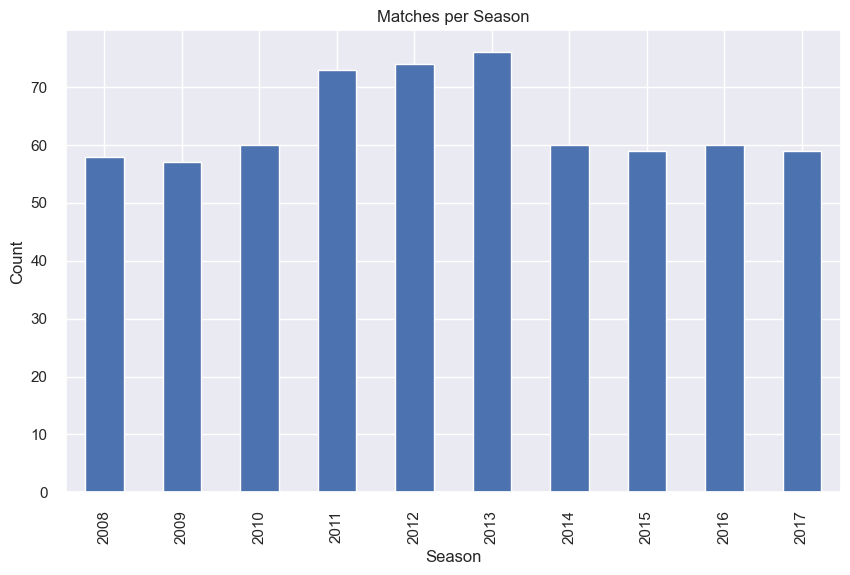

In [27]:
# These plots tell us season structure, venue effects, toss patterns, and win margin trends. They later guide feature engineering.

# ----- Cell 5: matches per season -----
# Count matches per season → bar chart
ax = matches["season"].value_counts().sort_index().plot(kind="bar")
ax.set_title("Matches per Season")
ax.set_xlabel("Season"); ax.set_ylabel("Count")
plt.show()

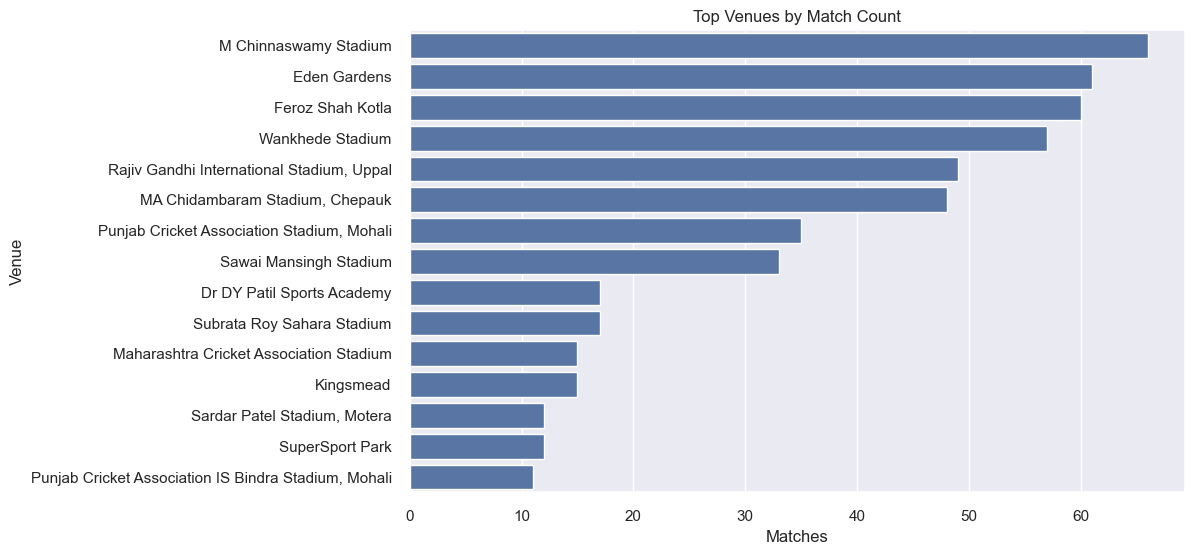

In [28]:
# ----- Cell 6: top venues -----
# Top 15 stadiums → helps see location bias
top_venues = matches["venue"].value_counts().head(15)
sns.barplot(x=top_venues.values, y=top_venues.index)
plt.title("Top Venues by Match Count")
plt.xlabel("Matches"); plt.ylabel("Venue")
plt.show()

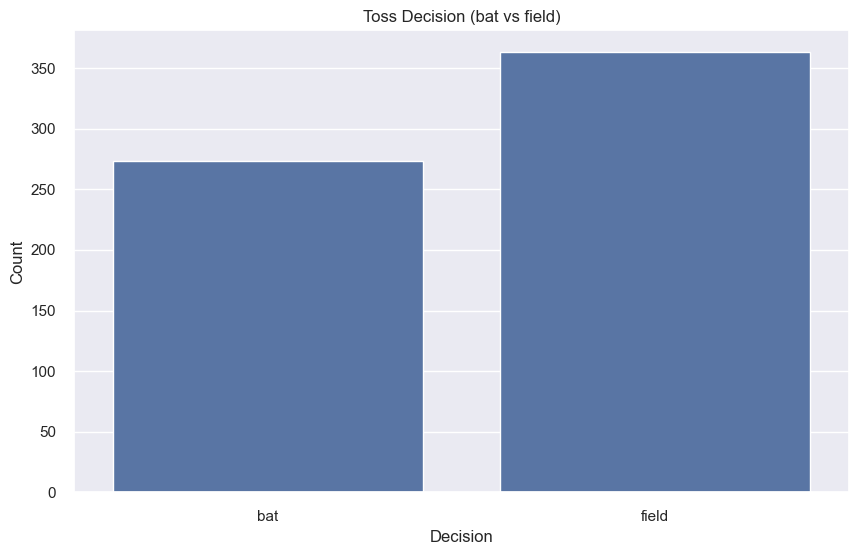

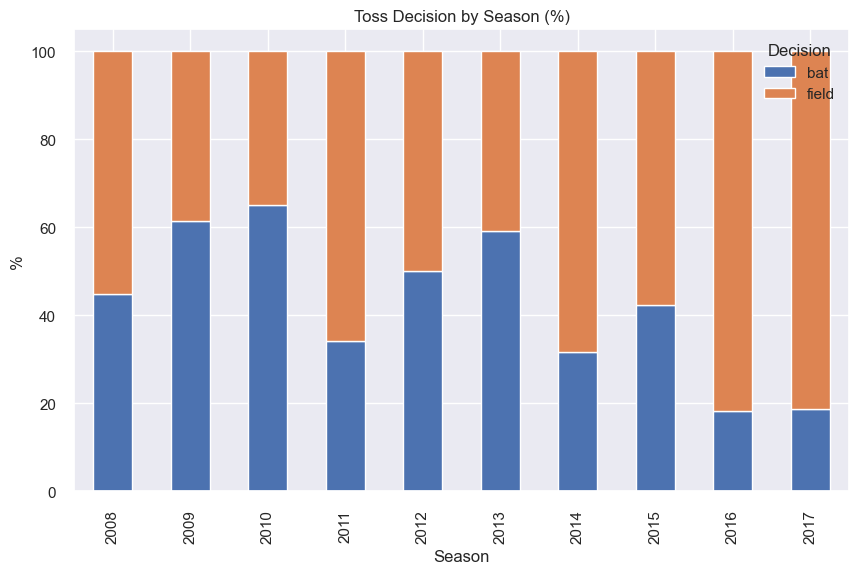

In [29]:
# ----- Cell 7: toss decision trend -----
# Toss choice (bat vs field) – shows evolution over time
sns.countplot(data=matches, x="toss_decision", order=["bat","field"])
plt.title("Toss Decision (bat vs field)")
plt.xlabel("Decision"); plt.ylabel("Count")
plt.show()

# Stacked bar: toss decision season-wise
ct = pd.crosstab(matches["season"], matches["toss_decision"])
(ct.div(ct.sum(1), 0) * 100).plot(kind="bar", stacked=True)
plt.title("Toss Decision by Season (%)"); plt.xlabel("Season"); plt.ylabel("%")
plt.legend(title="Decision")
plt.show()

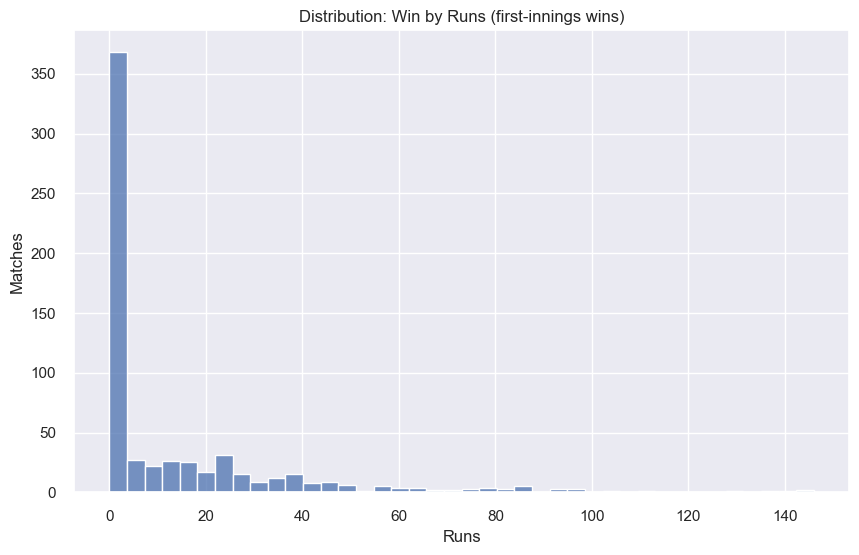

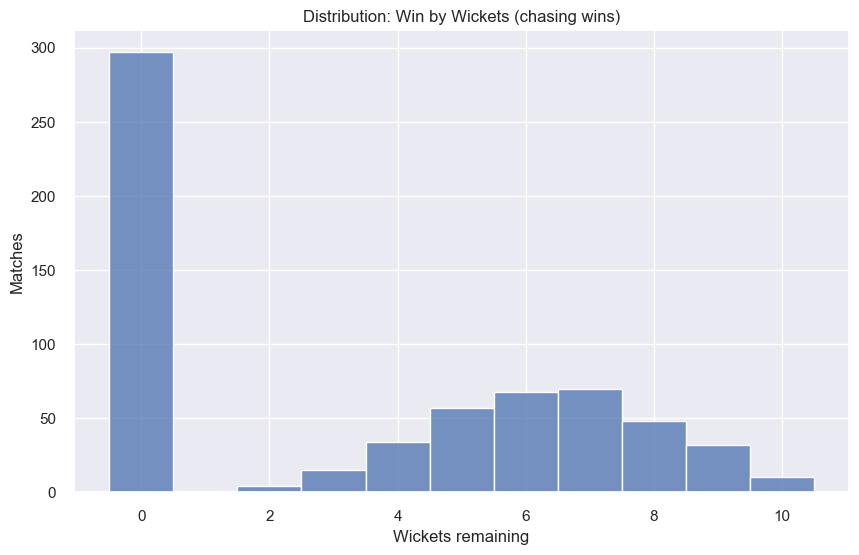

In [30]:
# ----- Cell 8: win margins -----
# Distribution of win margins (helps define regression targets later)
fig, ax = plt.subplots()
sns.histplot(matches["win_by_runs"], bins=40, ax=ax)
ax.set_title("Distribution: Win by Runs (first-innings wins)")
ax.set_xlabel("Runs"); ax.set_ylabel("Matches")
plt.show()

fig, ax = plt.subplots()
sns.histplot(matches["win_by_wickets"], bins=10, discrete=True, ax=ax)
ax.set_title("Distribution: Win by Wickets (chasing wins)")
ax.set_xlabel("Wickets remaining"); ax.set_ylabel("Matches")
plt.show()

### Deliveries-level EDA

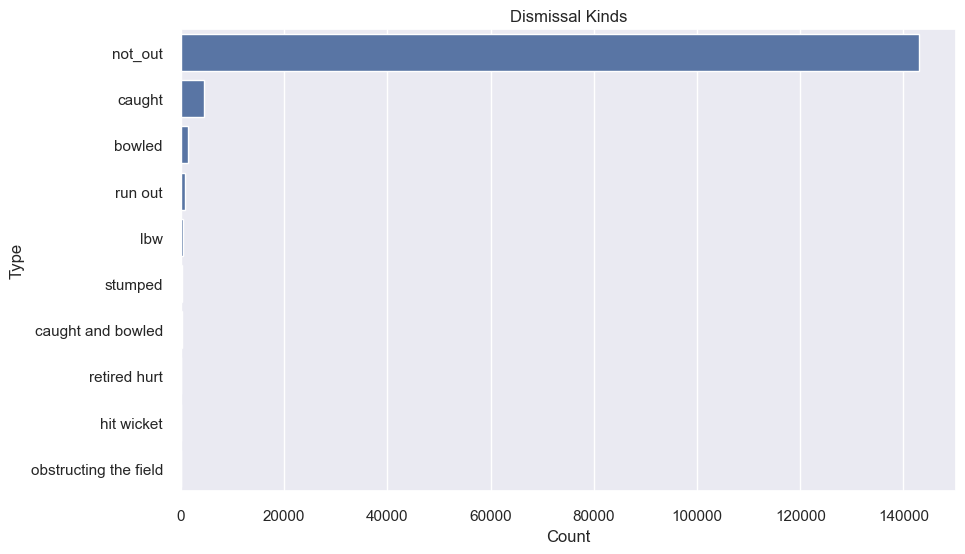

In [32]:
# Ball-level analysis reveals scoring phases, dismissal patterns, and inning dynamics.

# ----- Cell 9: dismissal kinds -----
# How batters usually get out – categorical summary
dk = deliveries["dismissal_kind"].fillna("not_out").value_counts()
sns.barplot(x=dk.values, y=dk.index)
plt.title("Dismissal Kinds")
plt.xlabel("Count"); plt.ylabel("Type")
plt.show()

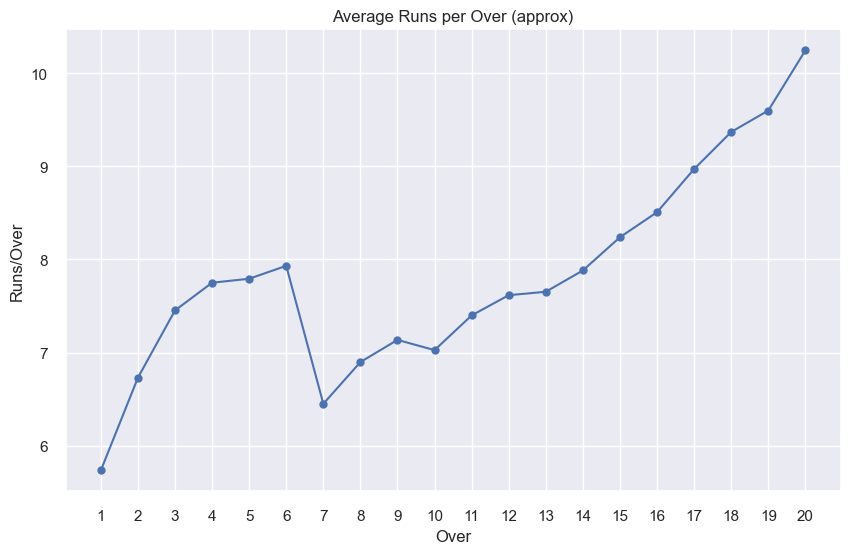

In [33]:
# ----- Cell 10: runs per over -----
# Avg runs scored per over (all matches combined)
runs_per_over = deliveries.groupby("over")["total_runs"].sum().div(
    deliveries.groupby("over").size()   # number of balls in that over
) * 6   # convert avg per-ball to per-over

runs_per_over.plot(marker="o")
plt.title("Average Runs per Over (approx)")
plt.xlabel("Over"); plt.ylabel("Runs/Over")
plt.xticks(range(1,21))
plt.show()

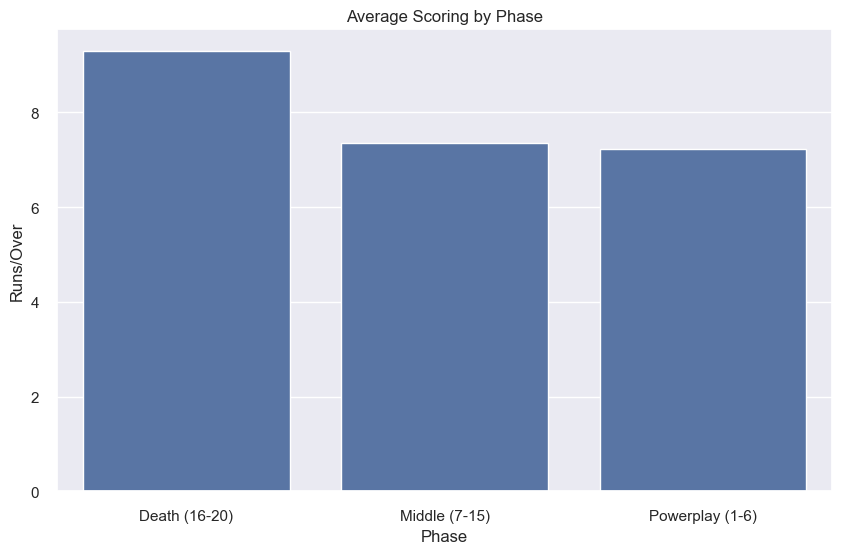

In [34]:
# ----- Cell 11: powerplay vs middle vs death -----
# Function to map over → phase
def phase(over):
    if over <= 6:   return "Powerplay (1-6)"
    if over <= 15:  return "Middle (7-15)"
    return "Death (16-20)"

phase_rr = (deliveries
            .assign(phase=deliveries["over"].map(phase))
            .groupby("phase")["total_runs"].mean()*6)

sns.barplot(x=phase_rr.index, y=phase_rr.values)
plt.title("Average Scoring by Phase")
plt.xlabel("Phase"); plt.ylabel("Runs/Over")
plt.show()

### First vs Second Innings

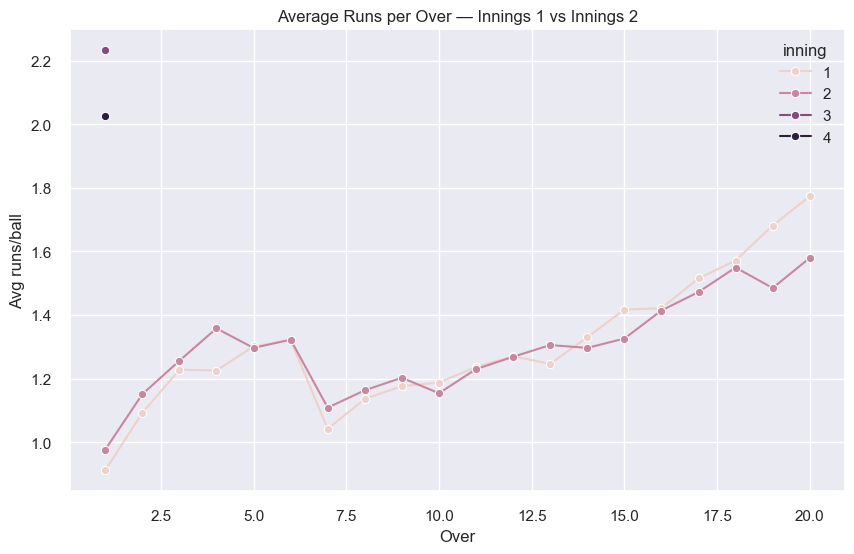

In [36]:
# Win probability depends heavily on chasing difficulty. Compare scoring between innings.

# ----- Cell 12: avg runs per over by innings -----
avg_over_innings = (deliveries
                    .groupby(["inning","over"])["total_runs"]
                    .mean()
                    .reset_index())

sns.lineplot(data=avg_over_innings, x="over", y="total_runs", hue="inning", marker="o")
plt.title("Average Runs per Over — Innings 1 vs Innings 2")
plt.xlabel("Over"); plt.ylabel("Avg runs/ball")  # per ball (multiply by 6 for over-level)
plt.show()

### Takeaways

In [38]:
# Document insights for later FE/modeling.

# ----- Cell 13: mini summary -----
summary = pd.DataFrame({
    "matches_per_season": matches["season"].value_counts().sort_index(),
})
display(summary.head(10))

print(
    "\nNotes:\n"
    "- Powerplay vs Death overs scoring → feature engineering.\n"
    "- Toss decision + venue bias → add contextual features.\n"
    "- Win margins → regression target distributions.\n"
)

,matches_per_season
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60



Notes:
- Powerplay vs Death overs scoring → feature engineering.
- Toss decision + venue bias → add contextual features.
- Win margins → regression target distributions.

